In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
times = [480,215,257,212,270,263,251]
params = [16,32,32,64,128,256,512]
func_evals = [86,38,43,37,47,45,44]
data = np.transpose(np.array([times,params,func_evals]))
print(data.shape)

(7, 3)


In [7]:
df = pd.DataFrame(data=data,columns=['time','params','func_eval'])

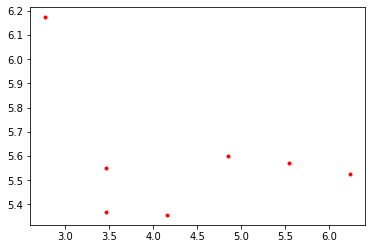

In [13]:
plt.plot(np.log(df['params']),np.log(df['time']),'.r')
plt.show()

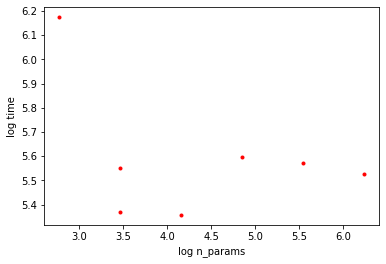

In [20]:
plt.plot(np.log(df['params']),np.log(df['time']),'.r')
plt.xlabel('log n_params')
plt.ylabel('log time')
plt.show()

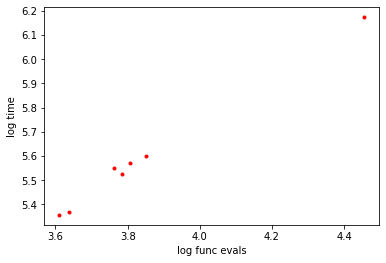

In [21]:
plt.plot(np.log(df['func_eval']),np.log(df['time']),'.r')
plt.xlabel('log func evals')
plt.ylabel('log time')
plt.show()

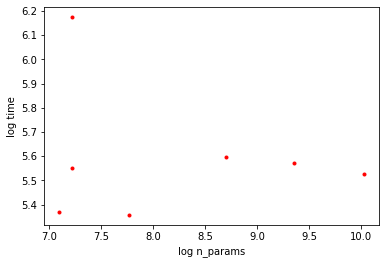

In [19]:
plt.plot(np.log(df['func_eval']) + np.log(df['params']),np.log(df['time']),'.r')
plt.xlabel('log n_params')
plt.ylabel('log time')
plt.show()

In [22]:
import astropy.table as at
tbl     = at.QTable.read('data/hat-p-20.fits')

In [25]:
tbl

wavelength [6144],flux [6144],flux_err [6144],mask [6144],BJD
Angstrom,,,,
float64,float32,float32,bool,float64
16954.624200620947 .. 15143.105296655693,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.91632
16954.733594961985 .. 15143.283509563797,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.92214
16954.73334237833 .. 15143.283165250903,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.92793
16954.623900358296 .. 15143.10475914319,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.9338
16954.623923159503 .. 15143.104838363555,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.93959
16954.73316181568 .. 15143.283040760787,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.94542
16954.73325230593 .. 15143.282954199023,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.9512
16954.623614073877 .. 15143.105073080049,0.0 .. 0.0,10000000000.0 .. 10000000000.0,True .. True,2456653.95708


         Current function value: 3510.547119
         Iterations: 32
         Function evaluations: 38
         Gradient evaluations: 38


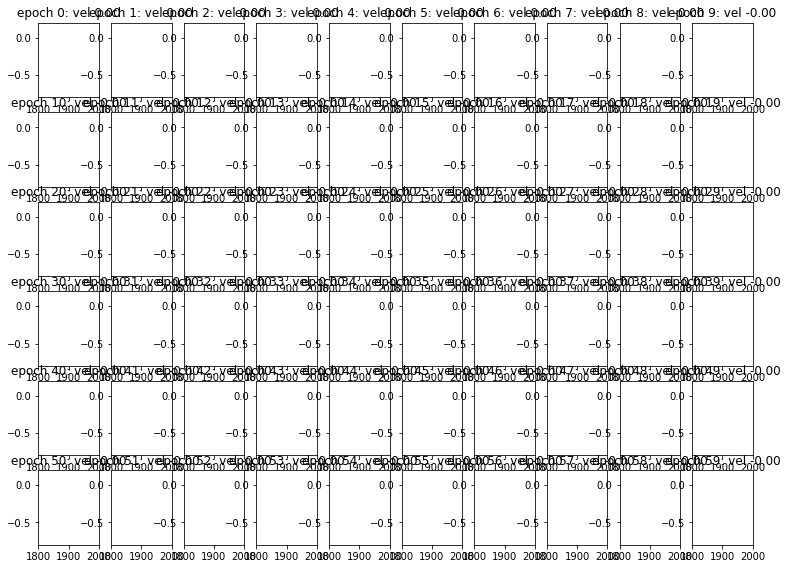

In [27]:
import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data

sigma = 80
n = 6000
subset = (0,6000)
xlim = (1800,2000)
tbl     = at.QTable.read('data/hat-p-20.fits')
dataset = wobble_data.AstroDataset(tbl['flux'],tbl['wavelength'],tbl['mask'],tbl['flux_err'])
dataset.interpolate_mask()
dataset.gauss_filter(sigma=sigma)
x, y, y_err = dataset.get_xy(subset=subset)

x_shifts = wobble_data.getInitXShift(tbl['BJD'],'HAT-P-20','APO')

loss_1 = wobble_model.LossFunc('L2Loss')
model  = wobble_model.JnpLin(n,y,x,x_shifts)

model.optimize(loss_1,maxiter=32)
model.plot(xlim=xlim)
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

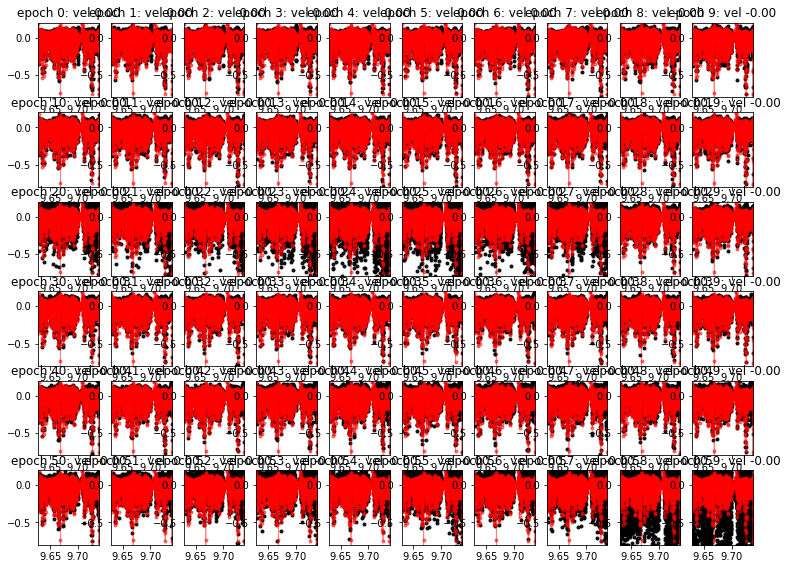

In [28]:
model.plot()
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

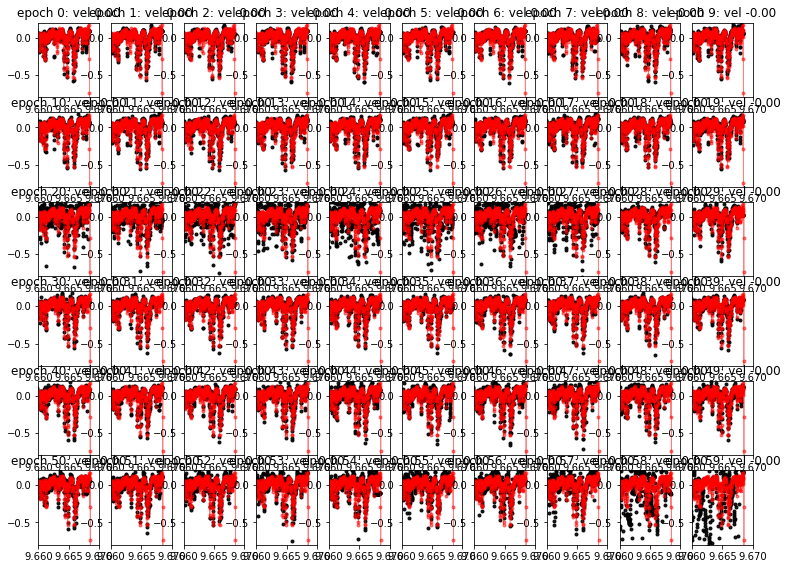

In [30]:
model.plot(xlim=(9.66,9.67))
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

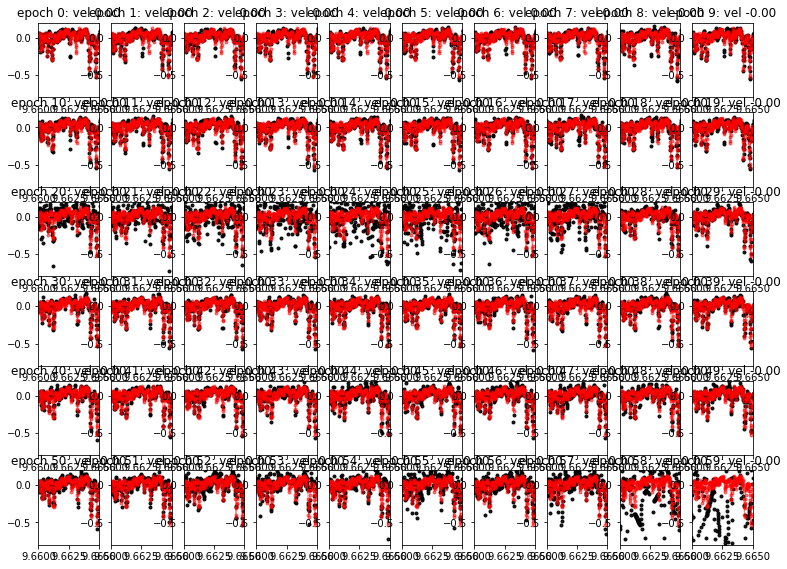

In [31]:
model.plot(xlim=(9.66,9.665))
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

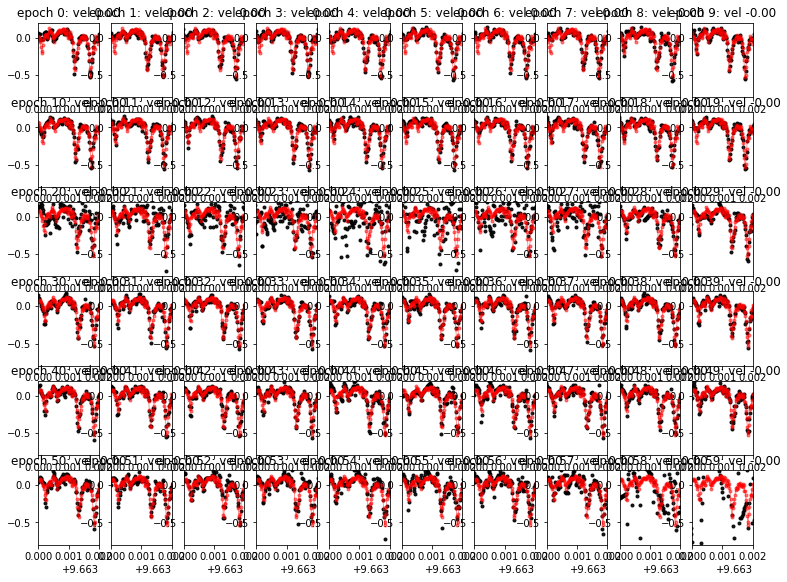

In [32]:
model.plot(xlim=(9.663,9.665))
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

In [56]:
print(n)

7000


In [57]:
import astropy.units as u
print(n/u.Angstrom)

7000.0 1 / Angstrom


         Current function value: 3477.560303
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39


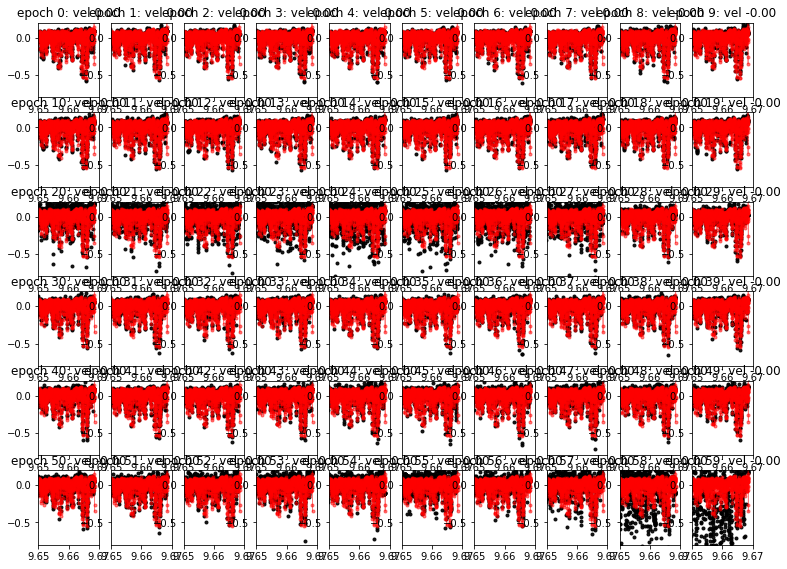

In [41]:
sigma = 80
n = 7000
subset = (0,6000)

tbl     = at.QTable.read('data/hat-p-20.fits')
dataset = wobble_data.AstroDataset(tbl['flux'],tbl['wavelength'],tbl['mask'],tbl['flux_err'])
dataset.interpolate_mask()
dataset.gauss_filter(sigma=sigma)
x, y, y_err = dataset.get_xy(subset=subset)

x_shifts = wobble_data.getInitXShift(tbl['BJD'],'HAT-P-20','APO')

loss_1 = wobble_model.LossFunc('L2Loss')
model  = wobble_model.JnpLin(n,y,x,x_shifts)

model.optimize(loss_1,maxiter=32)
model.plot(xlim=(9.65,9.67))
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(subset[0],subset[1],n))

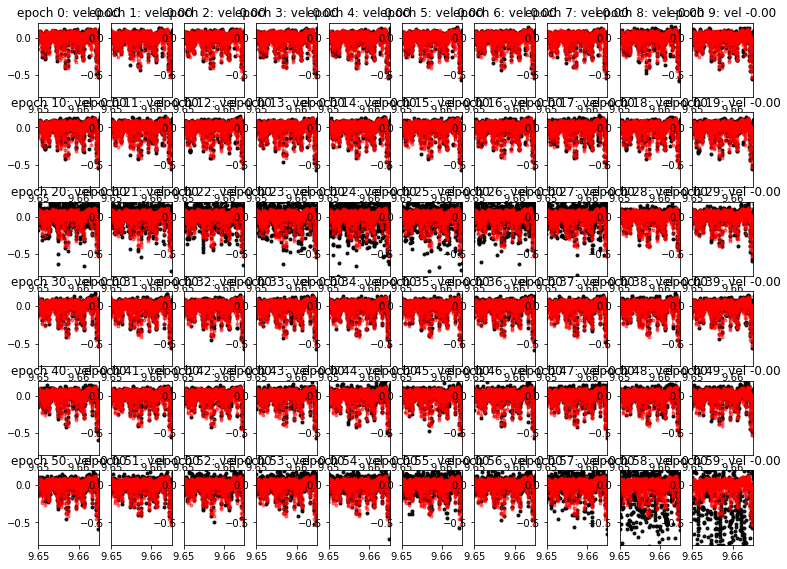

In [42]:
xlim = (9.65,9.665)
model.plot(xlim=xlim)
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(xlim[0],xlim[1],n))

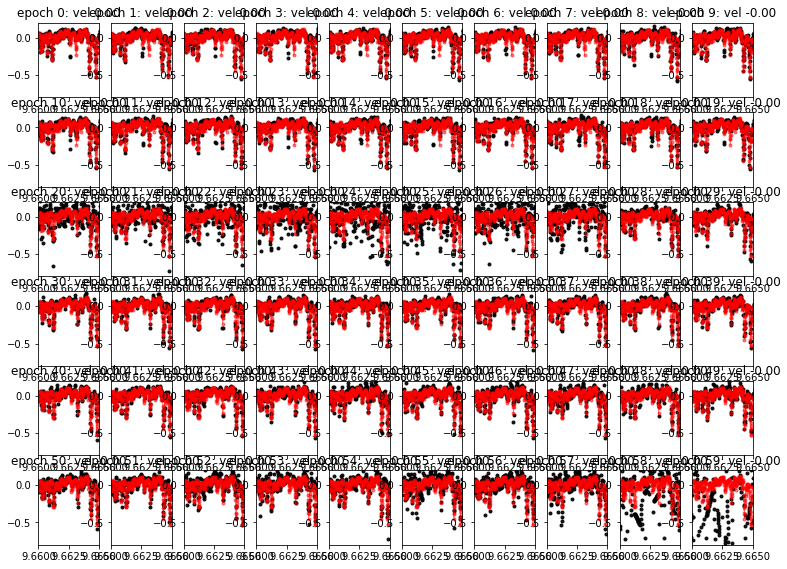

In [45]:
xlim = (9.660,9.665)
model.plot(xlim=xlim)
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(xlim[0],xlim[1],n))

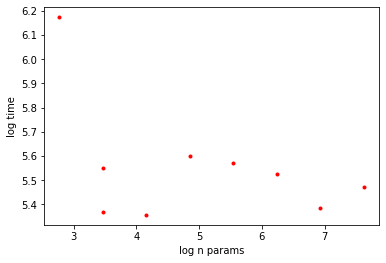

In [54]:
params =     [16 ,32 ,32 ,64 ,128,256,512,1024,2048]
times =      [480,215,257,212,270,263,251,218 ,238 ]
func_evals = [86 ,38 ,43 ,37 ,47 ,45 ,44 ,36  ,36. ]
data = np.transpose(np.array([times,params,func_evals]))
# print(data.shape)
df = pd.DataFrame(data=data,columns=['time','params','func_eval'])
plt.plot(np.log(df['params']),np.log(df['time']),'.r')
plt.xlabel('log n params')
plt.ylabel('log time')
plt.show()

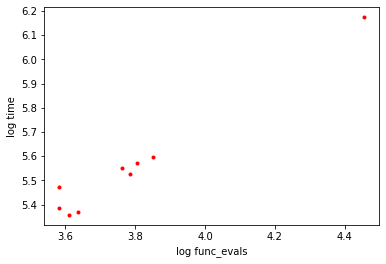

In [55]:
plt.plot(np.log(df['func_eval']),np.log(df['time']),'.r')
plt.xlabel('log func_evals')
plt.ylabel('log time')
plt.show()

TypeError: 'NoneType' object is not subscriptable

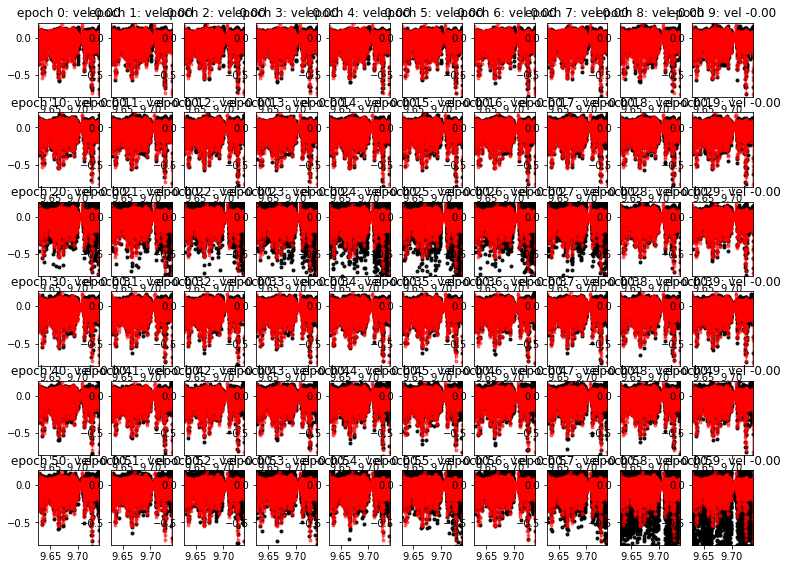

In [48]:
xlim = (None,None)
model.plot(xlim=xlim)
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(xlim[0],xlim[1],n))

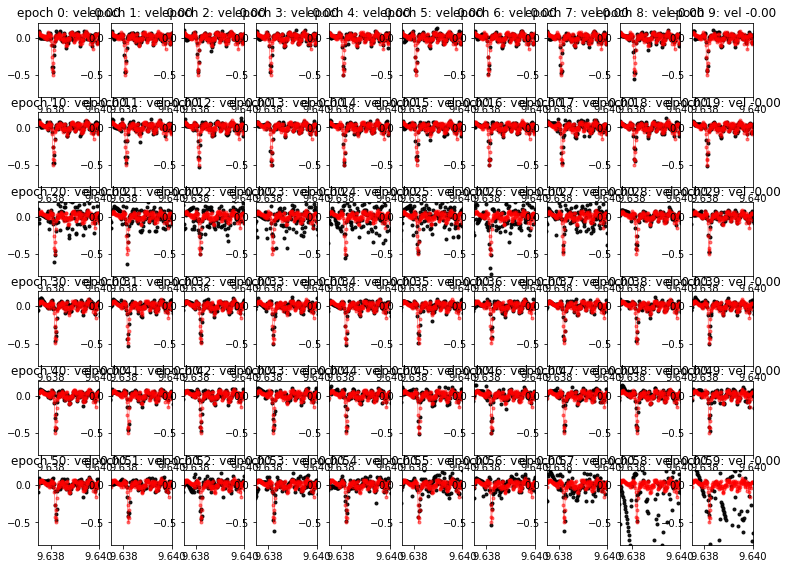

In [51]:
xlim = (9.6375,9.64)
model.plot(xlim=xlim)
plt.savefig('hatp20jnpL{}_R{}_N{}.png'.format(xlim[0],xlim[1],n))